### First version

    - 3 robots
    - all of them just find food
    - this behaviour is defined by LOVE towards Trees/Food
    - conditional if they are very close to food

In [1]:
#import pypot
#pypot.vrep.close_all_connections()

In [2]:
from simulator_interface import open_session, close_session
simulator, epuck1, epuck2, epuck3 = open_session(n_epucks=3)

N_TREES = 11

In [3]:
def fear(robot):
    left, right = robot.prox_activations(tracked_objects=["ePuck"])
    left_wheel = left
    right_wheel = right
    return left_wheel, right_wheel

def aggression(robot):
    left, right = robot.prox_activations(tracked_objects=["ePuck"])
    left_wheel = right
    right_wheel = left
    return left_wheel, right_wheel

def love_cuddly(robot):
    left, right = robot.prox_activations(tracked_objects=["ePuck"])
    left_wheel = 1 - left
    right_wheel = 1 - right   
    return left_wheel, right_wheel

def love_shy(robot):
    left, right = robot.prox_activations(tracked_objects=["ePuck"])
    left_wheel = 1 - right
    right_wheel = 1 - left   
    return left_wheel, right_wheel

In [4]:
def looking_for_food(robot):
    # love shy
    left, right = robot.prox_activations(tracked_objects=robot.to_find)
    left_wheel = right
    right_wheel = left   
    return left_wheel, right_wheel, 2

def dodge_obstacles(robot):
    left, right = robot.prox_activations(tracked_objects=["20cmHighWall100cm",
                                                          "20cmHighPillar10cm",
                                                          "ePuck"] + robot.found)
    left_wheel = 1 - right
    right_wheel = 1 - left
    return left_wheel, right_wheel, 0.5

def go_back(robot):
    # aggression
    left, right = robot.prox_activations(tracked_objects=robot.found)
    left_wheel = right
    right_wheel = left    
    return -left_wheel, -right_wheel, 0.8

def log_position(robot):
    robot.add_log("position", robot.position())

def check_if_tree_is_food(robot):
    dists, objs = robot.proximeters(mode="obj")
    if all(dists < 100) and all(['Tree' in o for o in objs]) and objs[0] == objs[1]:
        #simulator.remove_object(objs[0])
        if objs[0] in robot.to_find:
            robot.to_find.remove(objs[0])
            robot.found.append(objs[0])

In [5]:
initial_objects = [f"Tree#{i}" for i in range(N_TREES)]
initial_objects.append("Food")
for e in simulator.robots:
    e.to_find = initial_objects
    e.found = []

In [6]:
for e in simulator.robots:
    e.detach_all_behaviors()
    e.attach_behavior(looking_for_food, freq=10)
    e.attach_behavior(dodge_obstacles, freq=10)
    e.attach_behavior(go_back, freq=10)
    e.start_all_behaviors()
    
    e.attach_routine(check_if_tree_is_food, freq=5)
    e.attach_routine(log_position, freq=5)
    e.start_all_routines()

Behavior looking_for_food started
Behavior dodge_obstacles started
Behavior go_back started
Routine check_if_tree_is_food started
Routine log_position started
Behavior looking_for_food started
Behavior dodge_obstacles started
Behavior go_back started
Routine check_if_tree_is_food started
Routine log_position started
Behavior looking_for_food started
Behavior dodge_obstacles started
Behavior go_back started
Routine check_if_tree_is_food started
Routine log_position started


In [7]:
dists, objs = epuck2.proximeters(mode="obj", tracked_objects=["20cmHighWall100cm",
                                                          "20cmHighPillar10cm",
                                                          "ePuck"] + epuck2.found)

In [8]:
dists

array([ 890.11018465, 2000.        ])

In [9]:
epuck2.found

[]

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [22]:
paths = [np.array(e.get_log('position')) for e in simulator.robots]

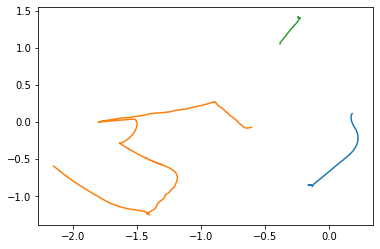

In [23]:
for path in paths:
    plt.plot(path[:, 0], path[:, 1])

In [13]:
paths

[array([[0.17922084, 0.11620784, 0.01917348],
        [0.17841963, 0.1147032 , 0.01917273]]),
 array([[-0.60617793, -0.06605126,  0.01917445],
        [-0.60617971, -0.06603073,  0.01917329],
        [-0.62919271, -0.07691576,  0.01916925]]),
 array([[-0.3843787 ,  1.05687201,  0.0191714 ],
        [-0.38517955,  1.06134677,  0.01917322]])]

In [14]:
for e in simulator.robots:
    print(e.found)

[]
[]
[]


In [15]:
objs

array(['None', 'None'], dtype='<U4')

In [16]:
#close_session(simulator)

In [17]:
all(dists < 10e6)

True

In [18]:
dir(simulator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_condition',
 '_vrep_epuck_suffix',
 'add_log',
 'add_sphere',
 'attach_routine',
 'check_routines',
 'close',
 'detach_all_routines',
 'detach_routine',
 'eatable_objects',
 'emit',
 'epuck_from_object_name',
 'get_epuck',
 'get_epuck_list',
 'get_log',
 'get_object_position',
 'io',
 'logger',
 'n_robots',
 'remove_object',
 'robots',
 'routine_manager',
 'seconds_to_run',
 'set_object_position',
 'start_all_routines',
 'start_routine',
 'start_sphere_apparition',
 'stop_all_routines',
 'stop_routine',
 'stop_sphere_apparition',
 'subscribe',
 'subscribers',
 'suffix_to_epuck',
 'unsubscribe',
 'vrep_mode',
 'wait']

In [19]:
simulator.get_object_position('Tree#0')

array([-0.20059721,  1.46432924,  0.36466795])

In [20]:
dir(epuck1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_prox_handles',
 '_attach',
 '_behaviors',
 '_body',
 '_camera',
 '_check',
 '_conditions',
 '_detach',
 '_detach_all',
 '_fwd_rot_2_lr',
 '_fwd_spd',
 '_has_eaten',
 '_left_joint',
 '_left_spd',
 '_light_sensor',
 '_lr_2_fwd_rot',
 '_prox_aliases',
 '_prox_handles',
 '_registered_objects',
 '_right_joint',
 '_right_spd',
 '_rot_spd',
 '_rot_speed',
 '_routines',
 '_sensations',
 '_start',
 '_start_all',
 '_stop',
 '_stop_all',
 '_wrapped_handle_notification',
 'add_log',
 'attach_behavior',
 'attach_routine',
 'attach_sensation',
 'base_lenght',
 'behavior_mixer',
 'camera_image',
 'camera_resolution',
 'catch_spher

In [21]:
epuck1.position()

[0.17558825016021729, 0.10855650901794434, 0.01917370781302452]